### Machine Learning Classifier Models
This is to compare some models:

    K-Nearest Neighbors (KNN)
    Logistic Regression
    Polynomial Logistic Regression
    Naive Bayes
    Linear Support Vector Machine (Linear SVM)
    Non-Linear Support Vector Machine (SVM Gaussian Radial Basis Function)
    Decision Tree
    Ensemble Method: Random Forest
    Ensemble Method: Voting Clasifier
    Multi-Layer Perceptron (MLP)


In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### sklearn.datasets.make_circles:
allow us to make synthetic dataset which is good for practicing on classification models.
   - make_circles(n_samples=100, *, shuffle=True, noise=None, random_state=None, factor=0.8)
        - noise (float): Standard deviation of Gaussian noise added to the data.
        - factor (float): Scale factor between inner and outer circle in the range (0, 1)

In [87]:

from sklearn.datasets import make_moons, make_circles

In [88]:
x, y = make_circles(n_samples=1000, factor=0.56, noise=0.2)

In [89]:
print(x.shape, y.shape)

(1000, 2) (1000,)


In [90]:
x

array([[ 0.13675428,  0.59273257],
       [-0.63188478,  0.88529504],
       [-0.34197937,  0.45940457],
       ...,
       [ 0.3350756 ,  0.11042359],
       [-0.87091111, -0.7059027 ],
       [ 0.16341892,  0.68750741]])

In [91]:
y.ravel()==0

array([False,  True, False, False,  True, False,  True,  True,  True,
        True, False, False,  True, False, False,  True, False,  True,
        True, False, False,  True, False,  True,  True,  True, False,
        True,  True, False,  True,  True, False, False, False,  True,
       False,  True, False,  True,  True, False, False,  True,  True,
        True,  True, False, False, False,  True,  True, False, False,
       False, False, False, False,  True, False,  True,  True, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True, False, False, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
       False,  True,  True, False, False,  True, False,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False,  True, False, False, False,  True,  True,
       False,  True,

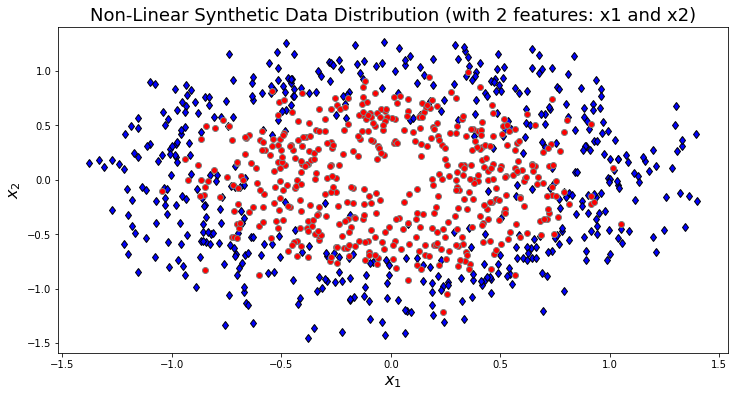

In [92]:
plt.figure(figsize = (12,6))
#  The numpy.ravel() functions returns contiguous flattened array(1D array)
plt.plot(x[y.ravel()==0,0],x[y.ravel()==0,1], "bd",markeredgecolor="k")
plt.plot(x[y.ravel()==1,0],x[y.ravel()==1,1], "ro",markeredgecolor="#7f7f7f")

plt.title("Non-Linear Synthetic Data Distribution (with 2 features: x1 and x2)", fontsize=18)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
# plt.xticks(()), plt.yticks(()) will remove the ticks
plt.show()

### Split dataset using train_test_split
random_state: Using an int will produce the same results across different calls. (using same seed)

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

In [94]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(850, 2) (150, 2) (850,) (150,)


### Draw Decision Boundary

using np.linespace to distribut the bounds of the domain over the grid

Difference between np.arange and np.linespace :

    - np.linspace allows you to define how many values you get including the specified min and max value. It infers the stepsize.
    
    - np.arange allows you to define the stepsize and infers the number of steps(the number of values you get).

    numpy.arange([start, ]stop, [step, ]dtype=None, *, like=None)

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


In [128]:
def draw_decision_boundary(x_test, y_test, name, model, train_accuracy, test_accuracy):
    
# define the bounds of the dataset (min and max for each feature)
    min_x1, max_x1 = x_test[:,0].min() - 0.1, x_test[:,0].max() + 0.1
    min_x2, max_x2 = x_test[:,1].min() - 0.1, x_test[:,1].max() + 0.1
    
# define the size of mesh grid with a size of 100
    x1grid = np.linspace(min_x1, max_x1, 100)
    x2grid = np.linspace(min_x2, max_x2, 100)
    x1, x2 = np.meshgrid(x1grid, x2grid)
    
# concatanate x1 and x2 into a new DataFrame
    x_new = np.c_[x1.ravel(), x2.ravel()]
    
# make prediction based on the model and make sure it has the same shape as features (x1, x2)
    yhat = model.predict(x_new).reshape(x1.shape)
    
# Next, we need to plot the grid of values as a contour plot. 
# get more colormaps (instead of cm.cool) 
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
    plt.figure(figsize = (6,6))
    plt.contourf(x1, x2, yhat, cmap=plt.cm.PiYG, alpha=0.99)
        
    #  The numpy.ravel() functions returns contiguous flattened array(1D array)
    plt.plot(x_test[y_test.ravel()==0,0],x_test[y_test.ravel()==0,1], "bd",markeredgecolor="k")
    plt.plot(x_test[y_test.ravel()==1,0],x_test[y_test.ravel()==1,1], "yo",markeredgecolor="#7f7f7f")
    
    plt.title("%s \nTrain Accuracy: %f | Test Accuracy: %f"% 
          (name, train_accuracy, test_accuracy) , fontsize=16)
    
    plt.xlabel("$x_1$", fontsize=16)
    plt.ylabel("$x_2$", fontsize=16)
    # plt.xticks(()), plt.yticks(()) will remove the ticks
    plt.show()

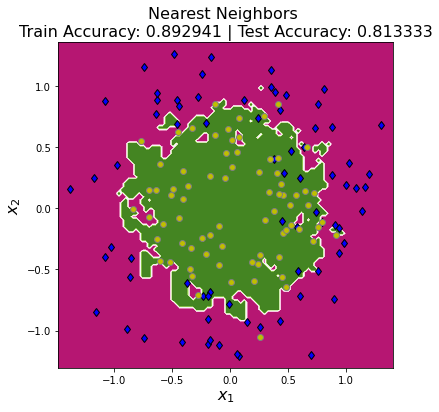

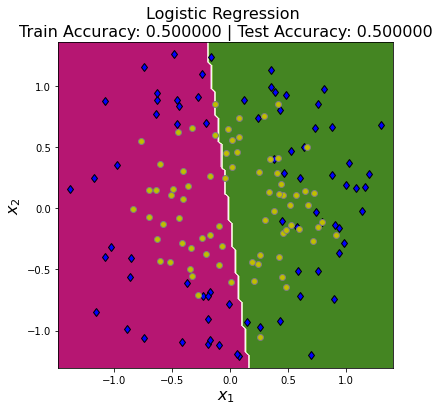

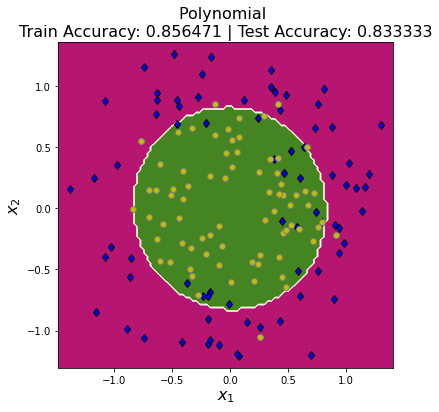

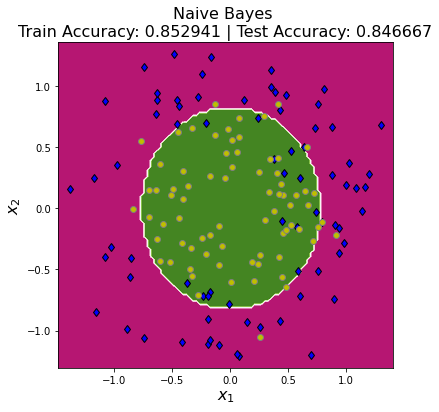

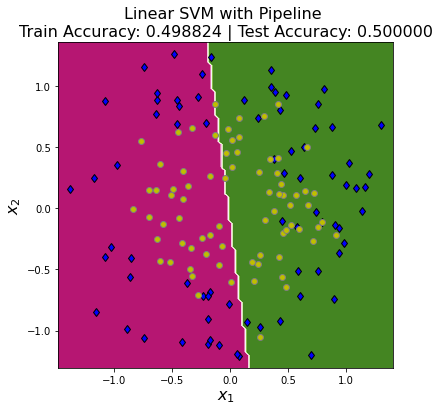

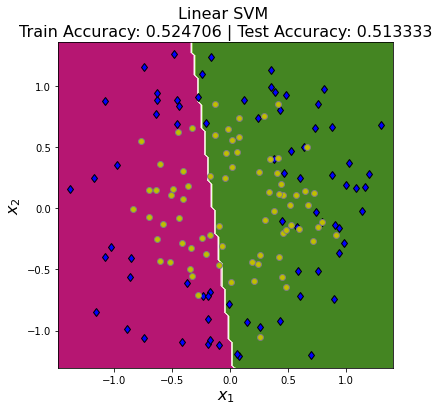

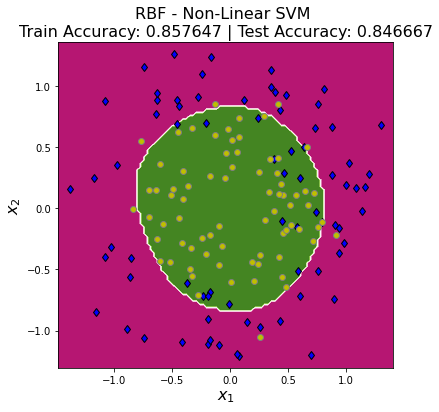

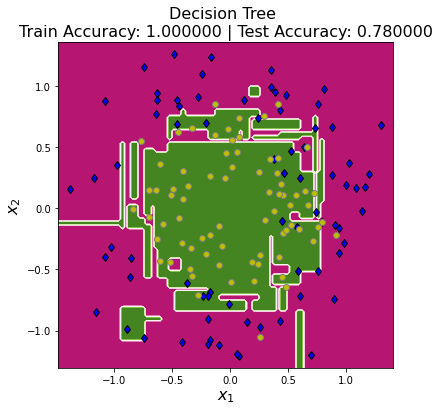

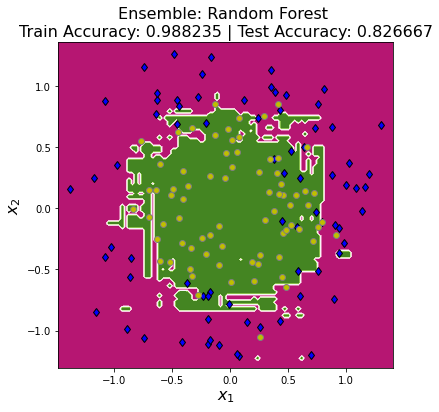

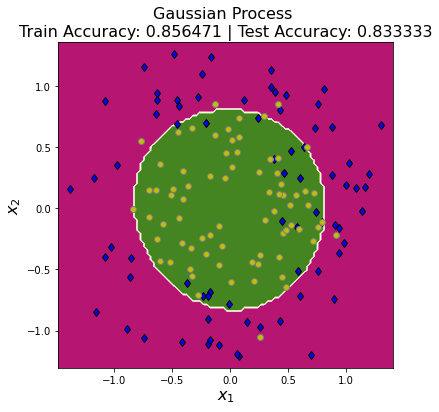

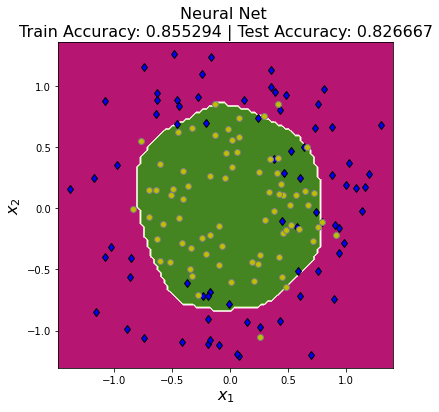

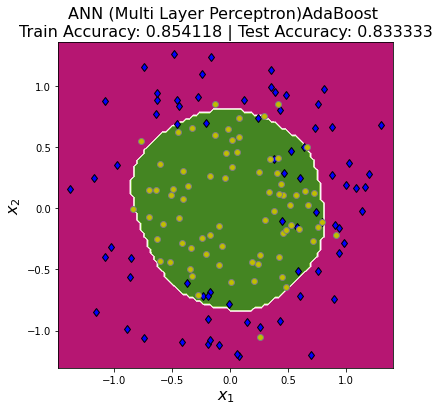

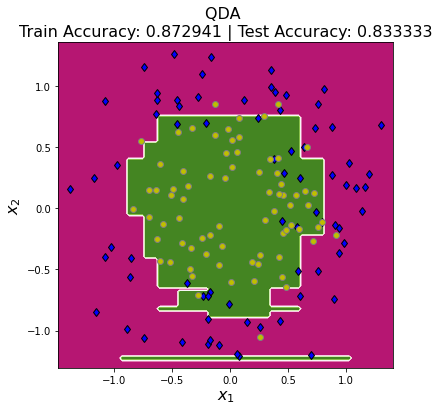

In [129]:

names = [
    "Nearest Neighbors",
    "Logistic Regression",
    "Polynomial",
    "Naive Bayes",
    "Linear SVM with Pipeline",
    "Linear SVM",
    "RBF - Non-Linear SVM",
    "Decision Tree",
    "Ensemble: Random Forest",
#     "Ensemble: Voting Classifier",
    "Gaussian Process",
    "Neural Net",
    "ANN (Multi Layer Perceptron)"
    "AdaBoost",
    "QDA",
]

models = [
    KNeighborsClassifier(3),
    LogisticRegression(),
    Pipeline([
    ("poly_features", PolynomialFeatures(degree=2)), # Add polynomial terms with the feature vector
    ("scaler", StandardScaler()), # Scale the features
    ("clf", LogisticRegression())
    ]),
    GaussianNB(),
    Pipeline([("scaler", StandardScaler()),("linear_svc", LinearSVC()),]),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="rbf", gamma=1.0, C=10),
    DecisionTreeClassifier(max_depth=20),
    RandomForestClassifier(max_depth=20, n_estimators=10),
#     VotingClassifier(estimators=[('K-NN', knn), 
#                     ('Naive Bayes', nb), 
#                     ('Support Vector Machine', svm), 
#                     ('Random Forest', rndforest)], voting='hard'),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    MLPClassifier(alpha=1, max_iter=1000),
    Pipeline([("scaler", StandardScaler()),
            ("MLP", MLPClassifier(hidden_layer_sizes=(10,), alpha=0.1, 
                              activation='logistic', solver='lbfgs',
                              early_stopping=True, n_iter_no_change=5, max_iter=1000)),]),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis(),
]

# iterate over classifiers
for name, model in zip(names, models):
#    ax = plt.subplot(len(datasets), len(models) + 1, i)
        
    model.fit(x_train, y_train)
        
    train_accuracy = model.score(x_train, y_train)
    test_accuracy = model.score(x_test, y_test)
        
    draw_decision_boundary(x_test, y_test, name, model, train_accuracy, test_accuracy)



add more depth to the decision surface by using the model to predict probabilities instead of class labels.

Code source: Gaël Varoquaux, Andreas Müller
             
Modified for documentation by Jaques Grobler

License: BSD 3 clause

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

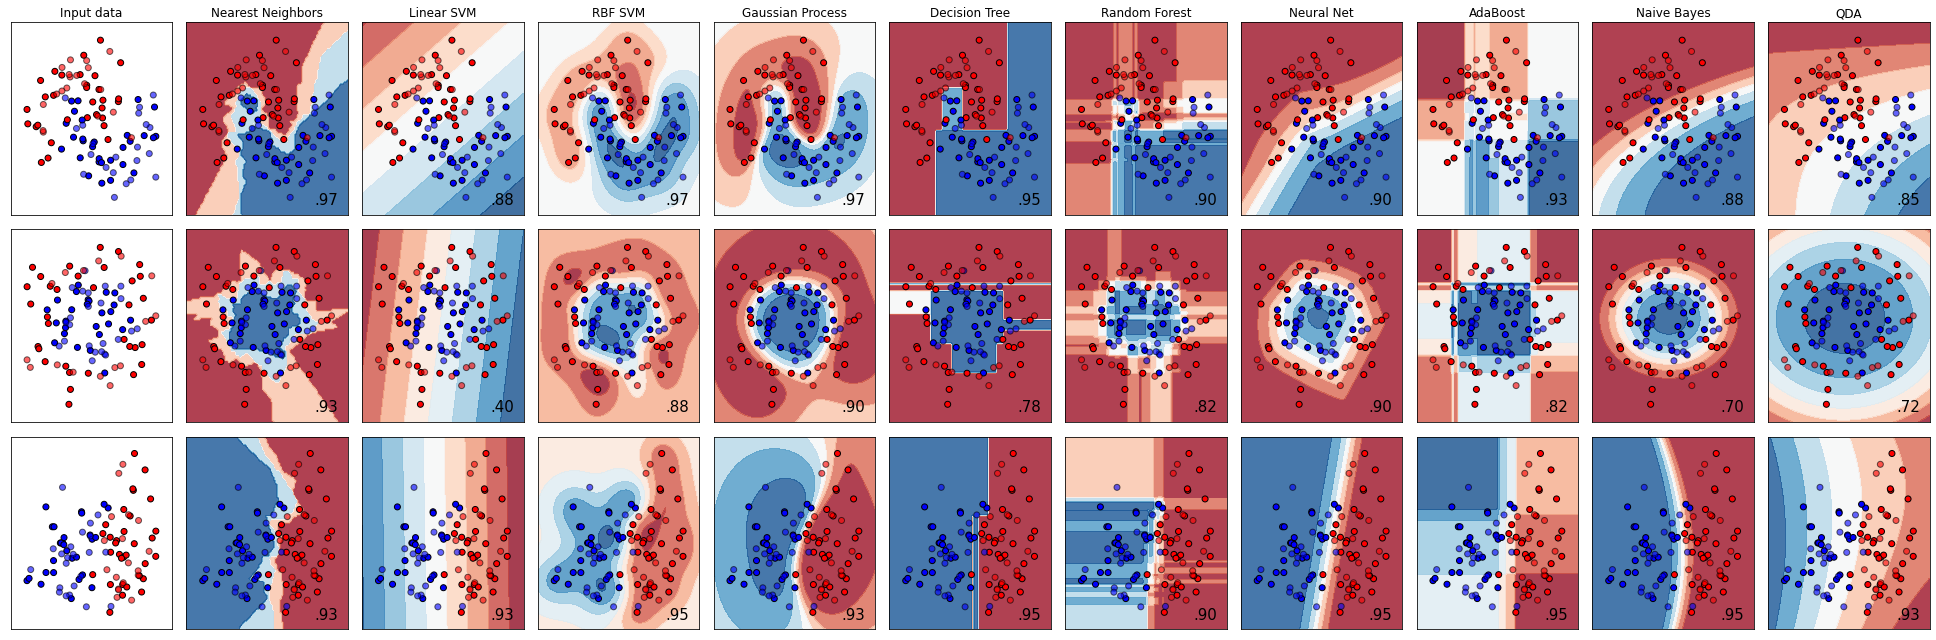

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()